<a href="https://colab.research.google.com/github/MariaDolmatova/ML/blob/main/miniproject1_Mariia_Dolmatova.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sumbitted by Mariia Dolmatova 764394105

Covariance and correlation

**Covariance** is showing us specifically the joint variability of the X and Y, i. e. if one value is increasing, would the other one follow it or not:

- $cov(X, Y) \ge 0$ - they follow each other
- $cov(X, Y) = 0$ - they data is most probably scattered spherically and there's no
- $cov(X, Y) \le 0$ - the dependence is negative. While one going "up", the other is going "down".

$cov(X, Y) \in [-\infty, \infty]$


**Correlation** is showing the strength of 2 values' connection. It is very similar to cov regarding being related to general trends (and it lies in the core of the corr formula), however correlation is:

$\rho_{X, Y} = corr(X, Y)= \frac{cov(X, Y)}{\sigma_x \cdot \sigma_Y}$ and the following prorerties come from the denominator:

-  $corr(X, Y) \in [-1, 1]$
- Unlike cov does not depend on the scale of the values
- If the corr is close to 1, it means the valiables and strongly connected and closely follow each other, if it's -1, there's a strong inverted connection.






In [198]:
!pip install fuzzywuzzy

import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from fuzzywuzzy import process

In [199]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [200]:
fig = px.scatter(iris, x="petal_length", y="petal_width", color="species", title = 'Different species based on petal parameters')
fig.show()

In [201]:
fig = px.scatter(iris, x="sepal_length", y="sepal_width", color="species", title = 'Different species based on sepal parameters')
fig.show()

In [202]:
def calcCov(x, y):
  cov = 0
  for i in range(len(x)):
    cov += (x[i] - np.mean(x)) * (y[i] - np.mean(y))
  return cov / (len(x) - 1)

In [203]:
def calcCorr(x, y):
  return calcCov(x, y) / (np.std(x) * np.std(y))

In [204]:
def covMat(data):
  cov_mat = np.zeros((data.shape[1], data.shape[1]))
  for i in range(data.shape[1]):
    for j in range(data.shape[1]):
      cov_mat[i][j] = calcCov(data.iloc[:, i], data.iloc[:, j])
  return cov_mat

In [205]:
cov_np = np.cov(iris[['sepal_length', 'sepal_width']], rowvar=False)
print('covariance by numpy: ', cov_np[1, 0])
cov_manual = calcCov(iris['sepal_length'], iris['sepal_width'])
print('covariance manual: ', cov_manual)

cov_mat_np = np.cov(iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']], rowvar=False)
print('covariance matrix numpy:\n', cov_mat_np)
cov_mat = covMat(iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
print('covariance matrix manual:\n', cov_mat)

covariance by numpy:  -0.042434004474272924
covariance manual:  -0.04243400447427291
covariance matrix numpy:
 [[ 0.68569351 -0.042434    1.27431544  0.51627069]
 [-0.042434    0.18997942 -0.32965638 -0.12163937]
 [ 1.27431544 -0.32965638  3.11627785  1.2956094 ]
 [ 0.51627069 -0.12163937  1.2956094   0.58100626]]
covariance matrix manual:
 [[ 0.68569351 -0.042434    1.27431544  0.51627069]
 [-0.042434    0.18997942 -0.32965638 -0.12163937]
 [ 1.27431544 -0.32965638  3.11627785  1.2956094 ]
 [ 0.51627069 -0.12163937  1.2956094   0.58100626]]


In [206]:
def corrMat(data):
  corr_mat = np.zeros((data.shape[1], data.shape[1]))
  for i in range(data.shape[1]):
    for j in range(data.shape[1]):
      corr_mat[i][j] = cov_mat[i][j] / (np.std(data.iloc[:, i]) * np.std(data.iloc[:, j]))
  return corr_mat

In [207]:
def corrMat2(data):
  corr_mat = np.zeros((data.shape[1], data.shape[1]))
  for i in range(data.shape[1]):
    for j in range(data.shape[1]):
      corr_mat[i][j] = calcCorr(data.iloc[:, i], data.iloc[:, j])
  return corr_mat

In [208]:
cor = np.corrcoef(iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']], rowvar=False)
print('correlation by numpy: \n', cor)

corr_manual = corrMat(iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
print('correlation manual: \n', corr_manual)

corr_manual2 = corrMat2(iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
print('correlation manual2: \n', corr_manual2)

correlation by numpy: 
 [[ 1.         -0.11756978  0.87175378  0.81794113]
 [-0.11756978  1.         -0.4284401  -0.36612593]
 [ 0.87175378 -0.4284401   1.          0.96286543]
 [ 0.81794113 -0.36612593  0.96286543  1.        ]]
correlation manual: 
 [[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]
correlation manual2: 
 [[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


I decided to calculate correlation matrix manually twice to be sure about the values I got. As you can see, the values of the built-in numpy are more percise and vary from both of the manual methods. I tried to dig deep and understand **why**.

One method uses the correlation function on every step, another one uses The fact that both manual methods gave out the same result erases the possibility of wrong implementation, as well as computation problems while loating rows (columns) in matrix. I believe this ~0.6% difference occured due to the np.std function (maybe while rounding up, however it's only a guess). Not only we calculate std twice, we also multily them on each step. This might have made the little deviations to become a bigger (but still relatively insignificant). Overall all the values follow strictly the patterm of np.corroef and cov matrices were almost exactly identical (differ with e-16, graphs below), meaning it's a minor deviation due to the std computation.

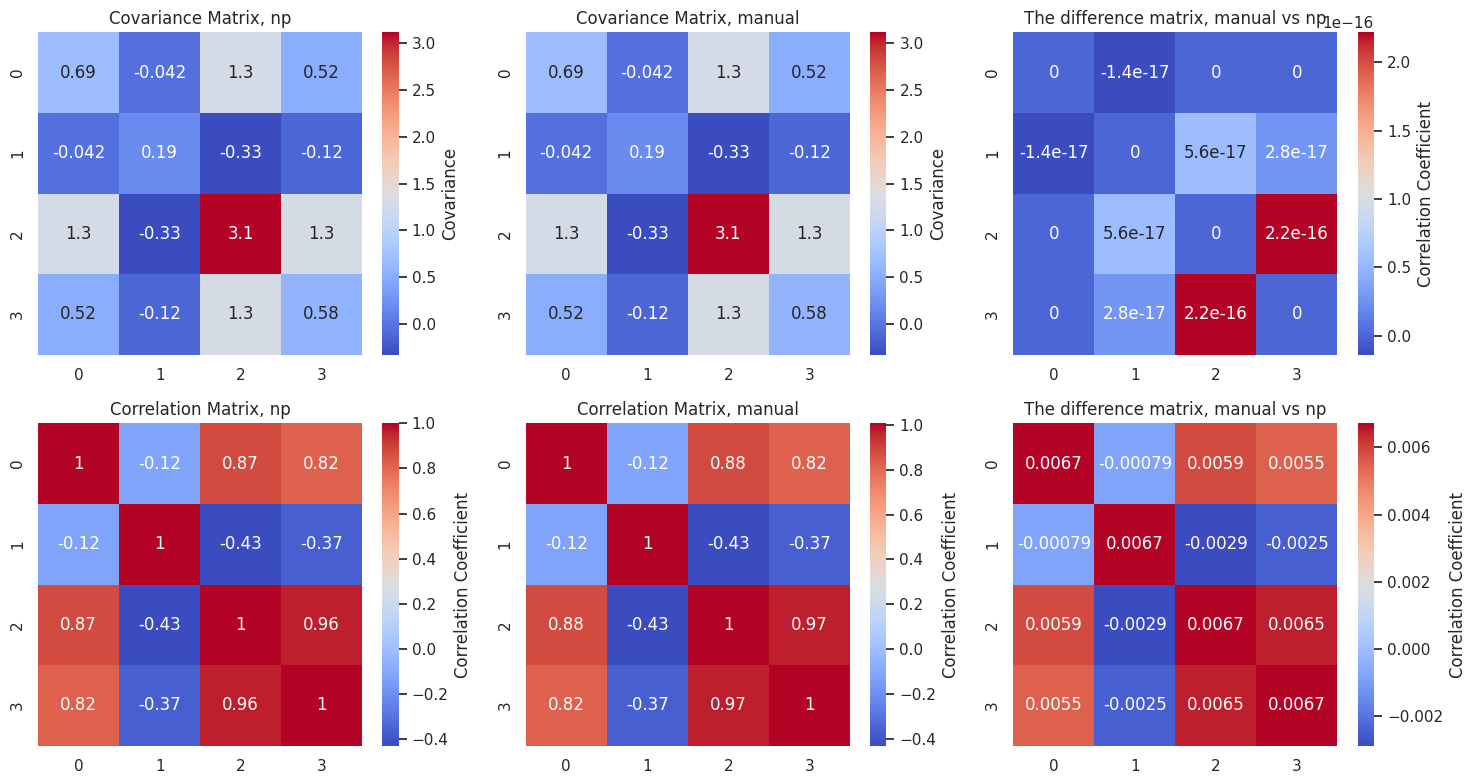

In [209]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

#heatmaps of cov
sns.heatmap(cov_mat_np, annot=True, cmap="coolwarm", ax=axes[0, 0], cbar_kws={'label': 'Covariance'})
axes[0, 0].set_title("Covariance Matrix, np")

sns.heatmap(cov_mat, annot=True, cmap="coolwarm", ax=axes[0, 1], cbar_kws={'label': 'Covariance'})
axes[0, 1].set_title("Covariance Matrix, manual")

sns.heatmap(cov_mat_np - cov_mat, annot=True, cmap="coolwarm", ax=axes[0, 2], cbar_kws={'label': 'Correlation Coefficient'})
axes[0, 2].set_title("The difference matrix, manual vs np")

#heatmaps of corr
sns.heatmap(cor, annot=True, cmap="coolwarm", ax=axes[1, 0], cbar_kws={'label': 'Correlation Coefficient'})
axes[1, 0].set_title("Correlation Matrix, np")

sns.heatmap(corr_manual, annot=True, cmap="coolwarm", ax=axes[1, 1], cbar_kws={'label': 'Correlation Coefficient'})
axes[1, 1].set_title("Correlation Matrix, manual")

sns.heatmap(corr_manual - cor, annot=True, cmap="coolwarm", ax=axes[1, 2], cbar_kws={'label': 'Correlation Coefficient'})
axes[1, 2].set_title("The difference matrix, manual vs np")

plt.tight_layout()
plt.show()

#Part 2

In [210]:
laptop_price = pd.read_csv('laptop_price.csv')
laptop_price.head()

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro)
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.3,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.8,8,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel,Core i5 7200U,2.5,8,256GB SSD,Intel,HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.7,16,512GB SSD,AMD,Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,3.1,8,256GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37,1803.60


In [211]:
fig = px.scatter(laptop_price, x="Company", y="Price (Euro)", color="Product", size="RAM (GB)", title = 'prices of all the laptops, by company and model')
fig.show()

In [212]:
fig = px.pie(laptop_price, names='Company', title='Distribution of companies')

fig.show() #made this one just out of curiosity

In [213]:
fig = px.box(laptop_price, x='Company', y='Price (Euro)', title='Distribution of prices for every company')
fig.update_layout(
  width=1000,
  height=800,
)
fig.show()

In [214]:
avg_prices = laptop_price.groupby('Company')['Price (Euro)'].mean()

max_avg_company = avg_prices.idxmax()
max_avg_price = avg_prices.max()

print(f"Company with the highest average price: {max_avg_company}")
print(f"Highest average price: {max_avg_price} Euro\n")
print(f"Average price of each company : \n{avg_prices}")

Company with the highest average price: Razer
Highest average price: 3346.1428571428573 Euro

Average price of each company : 
Company
Acer          633.464455
Apple        1564.198571
Asus         1123.829737
Chuwi         314.296667
Dell         1199.225120
Fujitsu       729.000000
Google       1677.666667
HP           1080.314664
Huawei       1424.000000
LG           2099.000000
Lenovo       1093.862215
MSI          1728.908148
Mediacom      295.000000
Microsoft    1612.308333
Razer        3346.142857
Samsung      1413.444444
Toshiba      1267.812500
Vero          217.425000
Xiaomi       1133.462500
Name: Price (Euro), dtype: float64


In [215]:
fig = px.bar(avg_prices, title='Average prices for every company')
fig.update_layout(
  width=1000,
  height=800,
)
fig.show()

In [216]:
fig = px.scatter(laptop_price, x="OpSys", y="Price (Euro)", color="Product", title = 'prices of all the laptops, by company and model')
fig.show()

In [217]:
standard_names = ['Windows', 'Linux', 'macOS', 'No OS']

laptop_price['OpSys'] = laptop_price['OpSys'].apply(lambda x: process.extractOne(x, standard_names)[0])
laptop_price.tail()

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro)
1270,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel,Core i7 6500U,2.5,4,128GB SSD,Intel,HD Graphics 520,Windows,1.80,638.0
1271,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel,Core i7 6500U,2.5,16,512GB SSD,Intel,HD Graphics 520,Windows,1.30,1499.0
1272,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel,Celeron Dual Core N3050,1.6,2,64GB Flash Storage,Intel,HD Graphics,Windows,1.50,229.0
1273,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel,Core i7 6500U,2.5,6,1TB HDD,AMD,Radeon R5 M330,Windows,2.19,764.0
1274,Asus,X553SA-XX031T (N3050/4GB/500GB/W10),Notebook,15.6,1366x768,Intel,Celeron Dual Core N3050,1.6,4,500GB HDD,Intel,HD Graphics,Windows,2.20,369.0


In [218]:
fig = px.scatter(laptop_price, x="OpSys", y="Price (Euro)", color="Product", title = 'Prices of all the laptops, by company and model, modified')
fig.show()

In [219]:
fig = px.pie(laptop_price, names='OpSys', title='Distribution of OS')

fig.show()

In [220]:
fig = px.box(laptop_price, x='OpSys', y='Price (Euro)', title='Distribution of prices for every OS')
fig.update_layout(
  width=1000,
  height=1500,
)
fig.show()

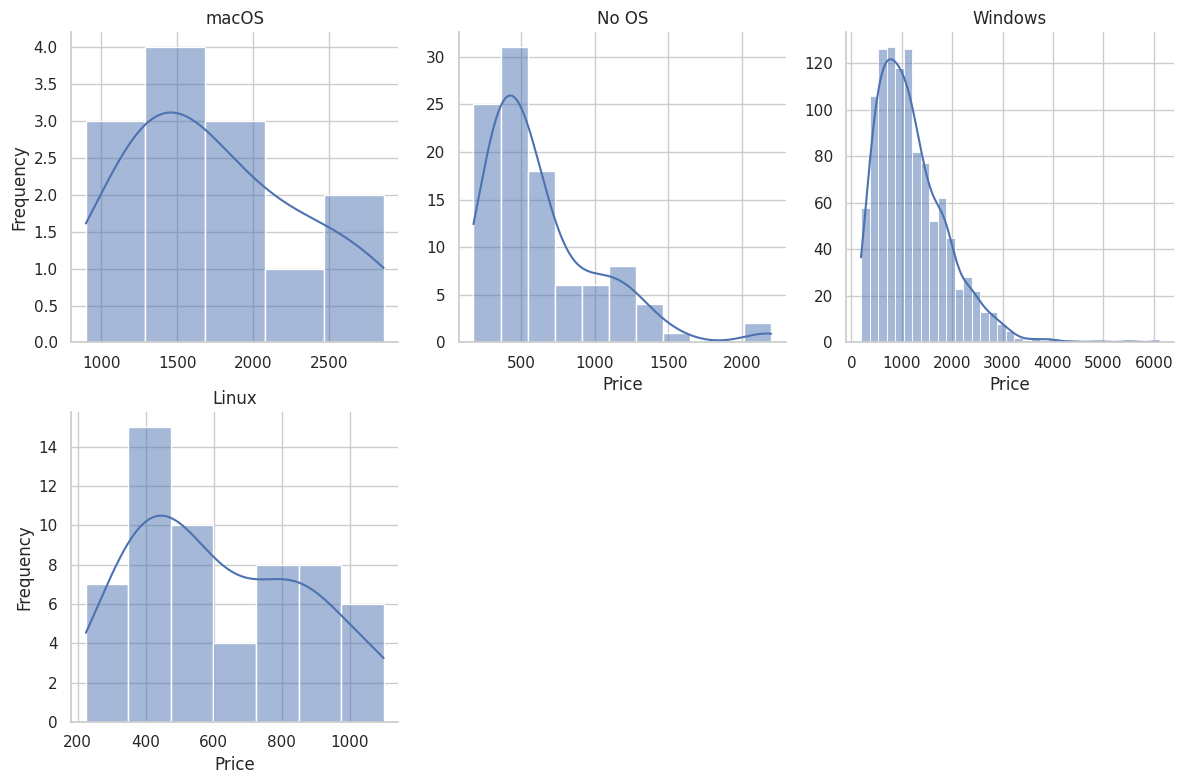

In [221]:
g = sns.FacetGrid(laptop_price, col="OpSys", col_wrap=3, height=4, sharex=False, sharey=False)
g.map(sns.histplot, "Price (Euro)", kde=True)

# Add titles and adjust layout
g.set_titles("{col_name}")
g.set_axis_labels("Price", "Frequency")
g.tight_layout()


I decided to find an average price for each RAM branch. I found that the bigger the RAM is, the higher the average price (graph below)

In [222]:
avg_prices_ram = laptop_price.groupby('RAM (GB)')['Price (Euro)'].mean()

fig = px.bar(avg_prices_ram, title='Average prices for every RAM')
fig.update_layout(
  width=1000,
  height=800,
)
fig.show()


In [223]:
laptop_price['Memory_Type'] = laptop_price['Memory'].str.extract(r'(\bSSD\b|\bHDD\b|\bHybrid\b|\bFlash Storage\b)')
laptop_price.head()

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro),Memory_Type
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.3,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69,SSD
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.8,8,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,898.94,Flash Storage
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel,Core i5 7200U,2.5,8,256GB SSD,Intel,HD Graphics 620,No OS,1.86,575.00,SSD
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.7,16,512GB SSD,AMD,Radeon Pro 455,macOS,1.83,2537.45,SSD
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,3.1,8,256GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37,1803.60,SSD


In [224]:
fig = px.pie(laptop_price, names='Memory_Type', title='Distribution of memory types')
fig.show()

#My question 1:

Does the fact that there's a touchscreen affect the price?

To understand that, I will first go through the data and find all the laptops with a touchscreen, then I will create a new column that would indicate if a computer is with a touchscreen display or not, and after that I will find the price average for both types and then plot the result.

In [226]:
laptop_price['Touchscreen'] = laptop_price['ScreenResolution'].str.contains('Touchscreen', case=False).map({True: 'Touchscreen', False: 'No Touchscreen'})
laptop_price.head()

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro),Memory_Type,Touchscreen
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.3,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69,SSD,No Touchscreen
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.8,8,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,898.94,Flash Storage,No Touchscreen
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel,Core i5 7200U,2.5,8,256GB SSD,Intel,HD Graphics 620,No OS,1.86,575.00,SSD,No Touchscreen
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.7,16,512GB SSD,AMD,Radeon Pro 455,macOS,1.83,2537.45,SSD,No Touchscreen
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,3.1,8,256GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37,1803.60,SSD,No Touchscreen


In [227]:
fig = px.pie(laptop_price, names='Touchscreen', title='Distribution of display types')
fig.show()

In [228]:
avg_prices_ram = laptop_price.groupby('Touchscreen')['Price (Euro)'].mean()

fig = px.bar(avg_prices_ram, title='Average prices for every RAM')
fig.update_layout(
  width=1000,
  height=800,
)
fig.show()

As we can see from the graph, the average price of computers with touchscreen is higher. Note that doesn't mean that it happens only because of the touchscreen, maybe these computers have a bigger RAM or made by a more expensive company.

My question 2:

Are screen size and weight connected? Is there any correlation between them and price?

I first made a plot in matplotlib (to be honest, just to show I can use it too, since mostly used px or sns), and then went on researching about their correlation with a primary graph, and then a correlation matrix.

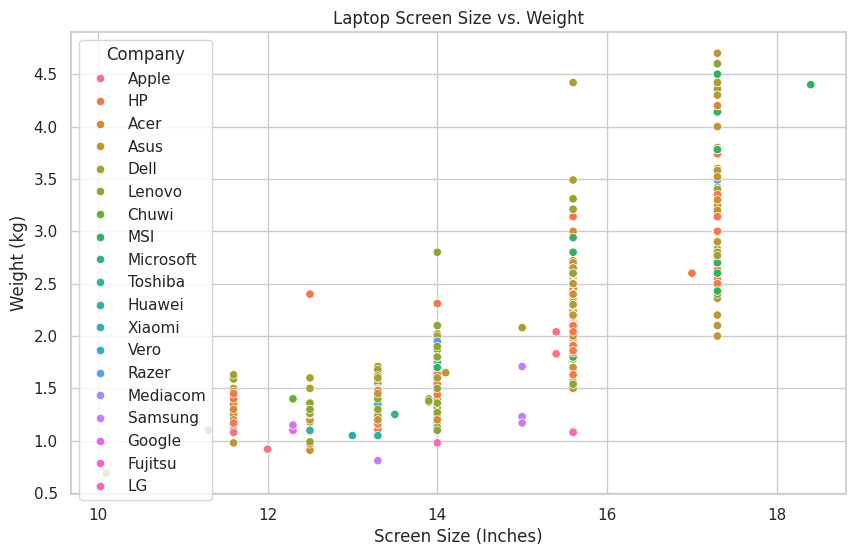

In [230]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Inches', y='Weight (kg)', data=laptop_price, hue='Company')
plt.xlabel('Screen Size (Inches)')
plt.ylabel('Weight (kg)')
_ = plt.title('Laptop Screen Size vs. Weight')

In [231]:
fig = px.scatter(laptop_price, x="Inches", y="Price (Euro)", color="Weight (kg)",
                 title="Correlation between weight, price, and inch size",
                 hover_data=["Company", "Product"])
fig.show()

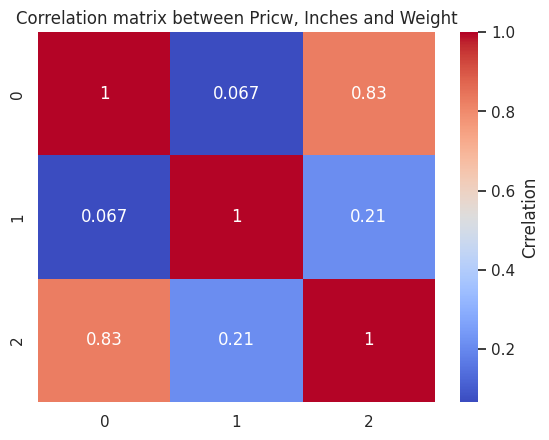

In [232]:
cor = np.corrcoef(laptop_price[['Inches', 'Price (Euro)', 'Weight (kg)']], rowvar=False)
sns.heatmap(cor, annot=True, cmap="coolwarm", cbar_kws={'label': 'Crrelation'})
plt.title("Correlation matrix between Price, Inches and Weight")
plt.show()

As we can see, the inches and weight are very correlated, whereas other parameters don't seem to relate very much.